# I. Introduction

## 1. Domain-specific area (rewrite)
In this work, we present a text classifier for detecting fake news. Fake news, also known as misinformation, refers to false or misleading information presented as if it were real news. It has become a major issue in recent years, with the proliferation of social media platforms and the ease with which false information can be disseminated. The negative impact of fake news cannot be understated, as it can lead to harm to individuals and society as a whole.

To address this problem, we have developed a machine learning-based text classifier that can accurately identify fake news articles. The classifier is trained on a large dataset of real and fake news articles, and uses various features of the text, such as word counts and sentiment, to make predictions.

We evaluate the performance of the classifier using several metrics, and show that it is able to achieve high accuracy in detecting fake news. We also discuss the potential applications of the classifier, including its use by news organizations to fact-check articles, and by social media platforms to combat the spread of fake news.

## 2. Objectives (add references)
This project aims to find a suitable way to perform text classification in news articles in order to classify if the article is or is not fake news. In order to adapt ourselves to the social media era and avoid the spread of misinformation we need to improve the ways we validate what is truth and what is not. Historically, we've seen that fake news can contribute to problems such as:
1. Damaging the reputation of people through spreading misinformaiton. [reference]
2. Advertise false propaganda in order to misguide elections and/or election results. [reference]
3. Generate confirmation bias manipulating one's perception of reality. [reference]
4. Estimulating conflicts in a situation where polarity is arising in society. [reference]

We've also seen the widespread of fake news during COVID which, according to studies [reference], have been one of the causes of vaccine hesitancy, which has lead to unnecessary deaths all over the world.

This work consists in an automated way to fact-check news in order to tackle the problems above and many more.

## 3. Dataset

### 3.1. Description
In this work we will explore a dataset consisting of two CSV files containing classified fake and real news and we will use it to train our Machine Learning Model in order to be able to evaluate and classify other news. The language is english and the dataset consists of the following features:
1. title: The title of the news article.
2. text: The article itself.
3. subject: Examples of a subject could be: politics, middle-east and news.
4. date: The date that the article was published.
### 3.2. Dataset size
The first CSV file called 'True.csv' holding the articles categorized as not fake news consists of 21417 articles. The second one called 'Fake.csv' consists of 23481 articles.
### 3.3. Data types
All the data types are strings, except for the last column in the dataset which is a Date.
### 3.4. Source
Source: 'Fake and real news - Classifying the news' taken from kaggle. [link]

## 4. Evaluation methodology

For the evaluation of the model the technique being used here is accuracy, since it is a simple and quick way to give a perspective of the performance in one single number and also very easy to use with the classification algorithm we are using (logistic regression). We are using numpy to calculate that based on the results of the prediction.

# II. Implementation

## 5. Preprocessing

### 5.1. Text representation
As for the text representation and lexical analysis we are using a Word2Vec model with the gensim library. The reason we decided to use this is due to the fact that it keeps information about the ordering of the words in the vector, which is going to be useful to later analyze the bigrams (words that keep appearing together) which can be informative in order to understand properties of fake news articles.
### 5.2 Pre-processing the data
As for the preprocessing and text normalization step, we are using the following techniques:
1. Tokenizing
Using nltk to separate each sentence into tokens.
2. Removing stopwords
We are also using nltk's stopwords list for the english vocabulary in order to remove words that have no meaning (such as 'is' and 'are').

### 5.3 File type format
As per the file type format, the raw data is in two CSV files, which will then be added labels and merged in order to extract the features for the classifier.

## Loading and inspect the dataset: https://www.kaggle.com/code/arund8888/titanic-classification-models-score-73
TO DO:
1. Create dataframes from CSVs (DONE)
2. Add column label to both dataframes (DONE)
3. Merge both the dataframes into one (DONE)
4. Describe columns/find and fix missing data (is it worth it?)
5. Plot two graphics: number of articles per subject and number of fake news per month/year

In [1]:
# Using pandas to load the dataset

import pandas as pd
import json

fake_df = pd.read_csv('Fake.csv')
true_df = pd.read_csv('True.csv')

In [19]:
# Adding a label to the true and fake dataframes so we can use the classifier next

fake_df['label'] = 'False'
true_df['label'] = 'True'

# Merging the two dataframes into one (we are going to need this in order to train the model)
data = pd.concat([fake_df, true_df])
data

# Shuffling the information
data = data.sample(frac = 1)

# Since there are too much rows (44898) in this dataframe and it is too costly to do operations such as iterate through it, I am going to use a subset of it
data_copy = data.head(10000) # This is what we are going to be using from now on
data_copy

,title,text,subject,date,label
12336,Mexico Senate committees pass controversial se...,MEXICO CITY (Reuters) - Mexican Senate committ...,worldnews,"December 14, 2017",True
1263,California attorney general to sue over Trump ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 13, 2017",True
17931,PRESIDENT TRUMP SLAM DUNKS Golden State NBA Pu...,"In June of 2017, it was reported that the newl...",left-news,"Sep 23, 2017",False
16948,The American Energy Success Story Obama Won’t ...,Obama has waisted billions on green energy but...,Government News,"Nov 29, 2015",False
4700,Trump tells House leaders to cancel healthcare...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"March 24, 2017",True
...,...,...,...,...,...
19303,TREASURY DEPT Depicts Lady Liberty As A Black ...,Lady Liberty will be depicted as a black women...,left-news,"Jan 15, 2017",False
18189,WATCH: RACIST CONGRESSWOMAN MAXINE WATERS Won’...,Close your eyes and picture Speaker of the Hou...,left-news,"Aug 7, 2017",False
1276,Senior U.S. legal official meeting UK leaders ...,LONDON (Reuters) - A top U.S. government legal...,politicsNews,"October 13, 2017",True
20827,WOW! BRITISH ACTRESS HAMMERS EU Leaders: “Ever...,Outspoken British actress and columnist asks b...,left-news,"Mar 23, 2016",False


### Exploratory data analysis

In [3]:
# Printing the unique subjects in each dataset
print("Subjects: ", data_copy.subject.unique())

Subjects:  ['News' 'left-news' 'politicsNews' 'politics' 'worldnews'
 'Government News' 'US_News' 'Middle-east']


In [4]:
# Printing the different columns
print("Columns:", data_copy.columns)

Columns: Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')


In [4]:
# Plotting the number of fake news per subject
import matplotlib.pyplot as plt
import seaborn as sb

# data['subject']
# plt.figure(figsize=(10,8))
# sb.countplot(data["subject"])
# plt.title("News")
# plt.xlabel("Politics")
# plt.xlabel("Government News")
# plt.xlabel("left-news")
# plt.xlabel("US_News")
# plt.xlabel("Middle-east")
# plt.ylabel("politicsNews")
# plt.ylabel("worldnews")

## Preprocessing the dataset

In [5]:
import nltk
from gensim.models import Word2Vec
from nltk.corpus import stopwords

# Preprocess the sentences
def preprocess(sentences):
    # Tokenize the sentences: transforming the whole string into a list of tokens. We need this for the Word2Vec model and for the classifier model
    sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
    # Lowercase the words
    sentences = [[word.lower() for word in sentence] for sentence in sentences]
    # Removing stopwords
    stop_words = stopwords.words('english')
    sentences = [word for word in sentences if not word in stop_words]
    
    return sentences

In [20]:
# Here we are creating a new column in the dataframe called 'clean_text' and adding the results of the preprocess method

sentences = data_copy['text']
sentences = preprocess(sentences)

data_copy['clean_text'] = sentences;
data_copy.head(10)

/var/folders/65/v6ssklls6x5dnvkx1dq1vnjh0000gp/T/ipykernel_8404/3211253336.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_copy['clean_text'] = sentences;


,title,text,subject,date,label,clean_text
12336,Mexico Senate committees pass controversial se...,MEXICO CITY (Reuters) - Mexican Senate committ...,worldnews,"December 14, 2017",True,"[mexico, city, (, reuters, ), -, mexican, sena..."
1263,California attorney general to sue over Trump ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 13, 2017",True,"[san, francisco, (, reuters, ), -, california,..."
17931,PRESIDENT TRUMP SLAM DUNKS Golden State NBA Pu...,"In June of 2017, it was reported that the newl...",left-news,"Sep 23, 2017",False,"[in, june, of, 2017, ,, it, was, reported, tha..."
16948,The American Energy Success Story Obama Won’t ...,Obama has waisted billions on green energy but...,Government News,"Nov 29, 2015",False,"[obama, has, waisted, billions, on, green, ene..."
4700,Trump tells House leaders to cancel healthcare...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"March 24, 2017",True,"[washington, (, reuters, ), -, president, dona..."
20383,WATCH: INDOCTRINATED COLLEGE STUDENTS Are Stun...,Would Hillary s every day Americans answer t...,left-news,"Jun 23, 2016",False,"[would, hillary, s, every, day, americans, ans..."
5660,"Trump administration tightens Iran sanctions, ...",WASHINGTON (Reuters) - The Trump administratio...,politicsNews,"February 2, 2017",True,"[washington, (, reuters, ), -, the, trump, adm..."
20657,AMERICA IS HAMMERING TARGET: #BoycottTarget Pe...,Did Target really believe that 99.8% of Americ...,left-news,"Apr 29, 2016",False,"[did, target, really, believe, that, 99.8, %, ..."
3396,Twitter Mocks The Hell Out Of Trump For Lates...,"When Trump promised to drain the swamp, he s...",News,"December 15, 2016",False,"[when, trump, promised, to, drain, the, swamp,..."
13974,WAS IRANIAN BUSINESSMAN FREED FROM JAIL After ...,Just before an Iranian-American businessman wa...,politics,"May 6, 2016",False,"[just, before, an, iranian-american, businessm..."


## Lexical Analysis

## Text representation: Word2Vec (Re-do: https://www.kaggle.com/code/hamishdickson/training-and-plotting-word2vec-with-bigrams)
TO DO:
1. Generate the model according to the link
2. Find a good way to plot the model

In [28]:
# Using gensim's phrases to find bigrams
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS


# Creating the model based on the sentences we have in the dataframe
bigrams = Phrases(sentences)
word2vec_model = Word2Vec(bigrams[sentences], min_count=3)
# Create a Word2Vec model and train it on the preprocessed sentences
# fake_lexical_model = Word2Vec(preprocessed_fake_sentences, window=5, min_count=1, workers=4)
# fake_lexical_model.train(preprocessed_fake_sentences, total_examples=len(sentences), epochs=10)

# true_lexical_model = Word2Vec(preprocessed_true_sentences, window=5, min_count=1, workers=4)
# true_lexical_model.train(preprocessed_true_sentences, total_examples=len(sentences), epochs=10)


# Generating a list of sentences so that we can use to test the model
fake_articles = preprocess(fake_df['text'])
true_articles = preprocess(true_df['text'])

In [37]:
# Now let us analyze some bigrams in the fake news articles: the bigrams will be shown as a pair firstWord_secondWord
print(bigrams[fake_articles[1000]])

['donald_trump', 'is', 'doing', 'a', 'horrendous', 'job', 'of', 'raising', 'his', 'historically', 'low', 'approval_rating', 'in', 'america', ',', 'and', 'it', 'looks_like', 'he', 's', 'not', 'doing', 'any', 'better', 'in', 'trying', 'to', 'gain', 'the', 'approval', 'and', 'trust', 'of', 'the', 'rest', 'of', 'the', 'world.thanks', 'to', 'a', 'new', 'survey', 'by', 'the', 'pew_research', 'center', ',', 'we_can', 'now', 'rest_assured', 'that', 'the', 'entire_world', 'hates', 'trump', 'just', 'as', 'much', 'as', 'most', 'americans', 'do', '.', 'the', 'pew_research', 'center', 'surveyed', '37', 'countries', ',', 'discovering', 'that', '74', '%', 'of', 'respondents', 'stated', 'that', 'when', 'it_comes', 'to', 'international_affairs', ',', 'they', 'have', 'zero', 'confidence', 'that', 'trump', 'will', 'respond', 'appropriately', 'or', 'do', 'the', 'right', 'thing.this', 'will_be', 'damaging', 'enough', 'to', 'trump', 's', 'ego', ',', 'but', 'it', 'gets', 'even_worse', 'for', 'him', '!', 'pew

In [47]:
# Inspecting the fake lexicalmodel: I am going to get the word 'nation' in the list above and check for similarities

# Length of the model:
print("Model length: ", len(word2vec_model.wv.key_to_index))

# how many dimensions?
print("Model dimensions:", len(word2vec_model.wv['nation']))

# How many words in the model?
words = list(word2vec_model.wv.key_to_index)
print("Model number of words", len(words))

# Finding similar terms
word2vec_model.wv.most_similar('nation', topn=20)

Model length:  45606
Model dimensions: 100
Model number of words 45606


[('country', 0.829025149345398),
 ('world', 0.7864201664924622),
 ('our_nation', 0.7679513692855835),
 ('democracy', 0.7441423535346985),
 ('america', 0.7328776717185974),
 ('europe', 0.7275346517562866),
 ('society', 0.7068667411804199),
 ('culture', 0.6782836318016052),
 ('latin_america', 0.6474127769470215),
 ('economy', 0.6364235281944275),
 ('movement', 0.6311262249946594),
 ('our_country', 0.6285148859024048),
 ('population', 0.6244226694107056),
 ('region', 0.6240020394325256),
 ('revolution', 0.6206173300743103),
 ('diversity', 0.6178780198097229),
 ('war', 0.6047477722167969),
 ('communities', 0.6045461893081665),
 ('rise', 0.6038730144500732),
 ('goal', 0.6018345952033997)]

## Plotting a graph with the vocabulary of the Word3Vec model

In [69]:
import string
from gensim.models import phrases, word2vec
from sklearn.decomposition import PCA

# We need to now find the vector representing each word, we can do this like so
X = word2vec_model.wv[words]

# Since our dataset dimensions are too high (45606),,we are going to be using Principal Component Analysis (PCA) to speed up the model training for 
# our Data Visualization
pca = PCA(n_components=3, random_state=11, whiten=True)
clf = pca.fit_transform(X)

# Creating a new dataframe with the model fit in order to visualize it afterwards
tmp = pd.DataFrame(clf, index=words, columns=['x', 'y', 'z'])

tmp.head(10)

,x,y,z
the,-3.085301,4.268082,0.174133
",",-0.711026,1.192138,2.956256
.,-1.565203,3.107696,1.744788
to,-2.609437,7.896048,-2.965057
of,-2.773418,1.693290,-0.378430
and,-1.079061,2.750147,-1.509399
a,-1.112795,2.595060,1.669646
in,-3.815563,2.075096,1.387466
that,-0.777524,8.624083,-0.145113
s,1.668675,2.051703,2.810199


In [79]:
# Picking up a smalle sample to put in the grid
from collections import Counter

sample = tmp.sample(50)

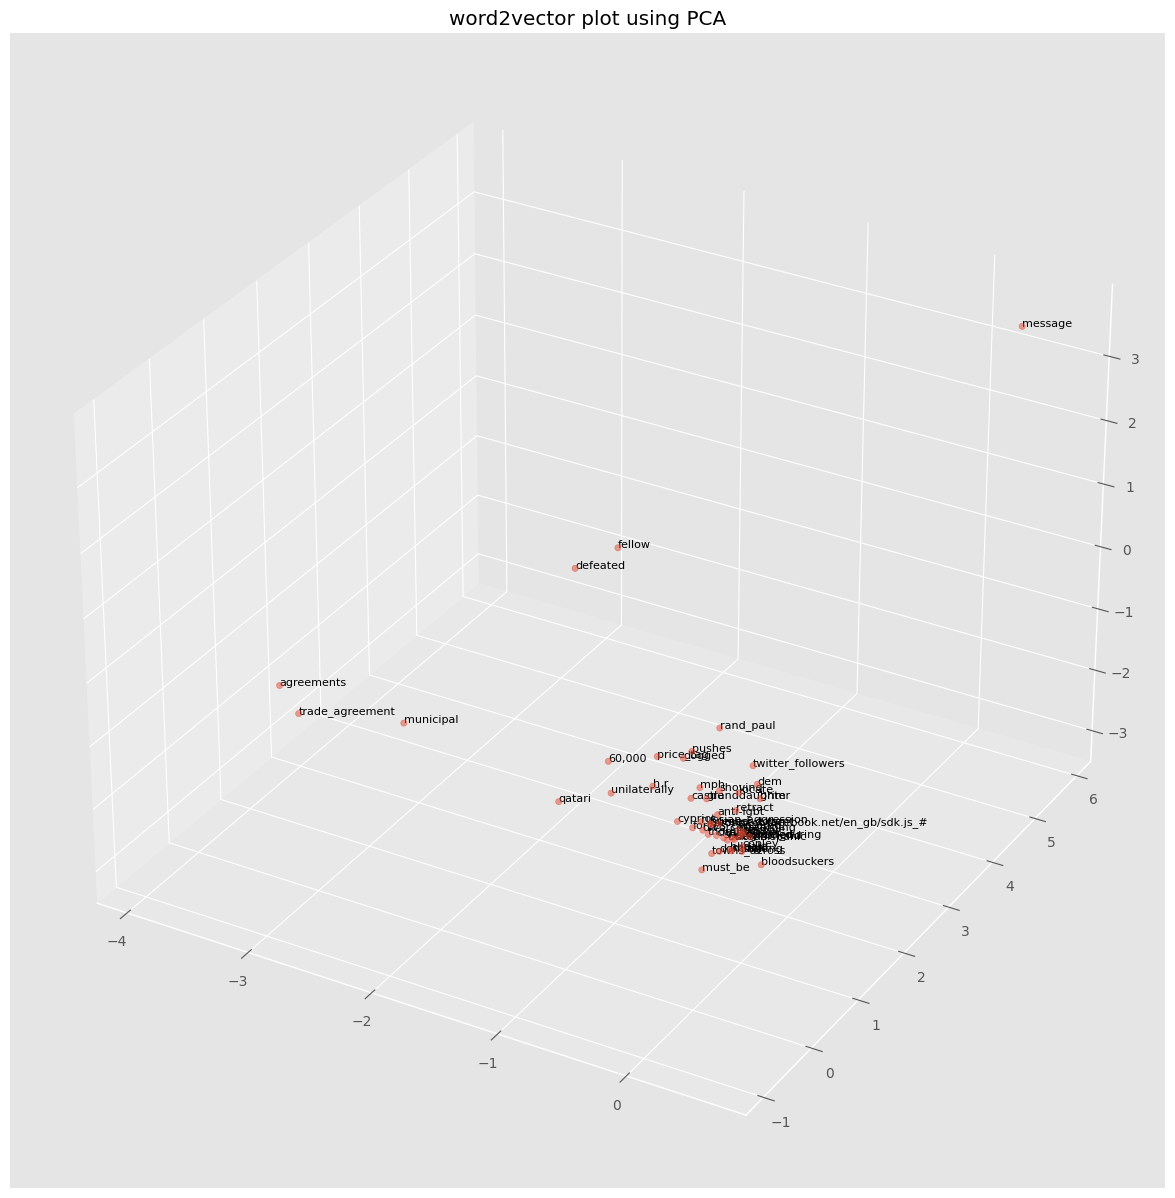

In [80]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

matplotlib.style.use('ggplot')
%matplotlib inline

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(sample['x'], sample['y'], sample['z'], alpha = 0.5)

for word, row in sample.iterrows():
    x, y, z = row
    pos = (x, y, z)
    ax.text(x, y, z, s=word, size=8, zorder=1, color='k')
    
plt.title('word2vector plot using PCA')
plt.show()

## 7. Classification approach

### 7.1 Features and Labels
For the classifier we are using two features: the 'title' which in the dataframe is the representation of the article and the 'label' which is the feature that tells which articles are true or fake.

### 7.2 Classifier
For the classifier we are using the logistic regression algorithm.

## Creating the model for the classifier
TO DO:
1. Make it work
2. Add column 'prediction' to dataframe and add prediction information for each sentence
3. Plot the number of fake news per subject

In [ ]:
# Fake news classifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Pre-process the data
texts = data['text'].values
labels = data['label'].values

# Tokenize the texts
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.33, random_state=42)

# Train the model
model = MultinomialNB()
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

for x in range(10):
    print(texts[x] + ' | ' + y_pred[x])

## 6. Baseline performance
Describe and justify the baseline against which you are going to compare the performance
of your chosen approach. This can be an already published baseline (e.g. cited in the
literature) or the results of a basic algorithm that you implement yourself. The baseline
should represent a meaningful benchmark for comparison.

## 8. Coding style
Your code is expected to meet certain standards as described by accepted coding
conventions. This includes code indentation, avoiding unnamed numerical constants and
undue use of string literals, assigning meaningful names to variables and subroutines, etc.
The code is expected to be fully commented, including variables, sub-routines and calls to
library methods.

# III. Conclusions

## 9. Evaluation

In [ ]:
import numpy as np

# Evaluate the model
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy:.2f}')

In [ ]:
# Using the model above on new data

# Pre-process the new data
X_new = vectorizer.transform(true_sentences[10])

# Use the model to make predictions on the new data
y_pred = model.predict(X_new)

# Print the predictions
y_pred

## 10. Summary and conclusions
Provide a reflective evaluation of the project in light of your results. Describe its
contributions to the problem area, and discuss the extent to which your solution is
transferable to other domain-specific areas. Discuss the extent to which your approach can
be replicated by others, e.g. using different programming languages, development
environments, libraries and algorithms. Review the potential benefits and drawbacks of
alternative approaches.